In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from src.metrics import *
from src.models import * 
from src.concept_vectors import *
import csv
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import seaborn as sns
import json 
import pickle 

2024-04-19 11:18:52.709562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Quantitative Evaluation

### Generate Tables

In [ ]:
dataset_name = 'cub'
methods = ['tcav','cem','concept2vec','label']
nice_names = ['TCAV','CEM','Concept2Vec','Label']

In [ ]:
cub_dict = {}
dataset_name = 'CUB'
for m,m_nice in zip(methods,nice_names):
    cub_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.lower(),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        cub_dict[m_nice][name] = value
    

In [ ]:
dsprites_dict = {}
dataset_name = 'dsprites'
for m,m_nice in zip(methods,nice_names):
    dsprites_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.lower(),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        dsprites_dict[m_nice][name] = value
    

In [ ]:
mnist_dict = {}
dataset_name = 'colored_mnist'
for m,m_nice in zip(methods,nice_names):
    mnist_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.replace('colored_',''),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        mnist_dict[m_nice][name] = value
    

In [ ]:
chexpert_dict = {}
dataset_name = 'chexpert'
for m,m_nice in zip(methods,nice_names):
    chexpert_dict[m_nice] = {}
    file_name = "results/evaluation/{}/{}_{}.txt".format(dataset_name,dataset_name.lower(),m)
    data = open(file_name).read().strip().split("\n")
        
    for line in data:
        name, value = line.split(": ")
        name = name.lower().split(" ")[-1]
        value = eval(value)
        chexpert_dict[m_nice][name] = value
    

In [ ]:
all_dicts = {
    'mnist': mnist_dict,
    'cub': cub_dict,
    'dsprites': dsprites_dict,
    'chexpert': chexpert_dict,
}

In [ ]:
columns = ['truthfulness','robustness','responsiveness','stability']
datasets = ['mnist','cub'] 
for m in nice_names:
    values = [[all_dicts[d][m][c] for c in columns] for d in datasets]
    for i in values:
        i[1] = (1-i[1][0],i[1][1])
        i[3] = (1-i[3][0],i[3][1])

    s = "{} & ".format(m)
    
    other_values = []
    
    for d in range(len(datasets)):
        for i in values[d]:
            if m == 'Label':
                other_values.append("\\textbf{{{:0.2f} $\\pm$ {:0.2f}}}".format(i[0],i[1]))
            else: 
                other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    s += " & ".join(other_values)
    s += " \\\\"

    if m == "Label":
        s += " \\bottomrule"

    print(s)


In [ ]:
columns = ['truthfulness','robustness','responsiveness','stability']
datasets = ['dsprites','chexpert'] 
for m in nice_names:
    values = [[all_dicts[d][m][c] for c in columns] for d in datasets]
    for i in values:
        i[1] = (1-i[1][0],i[1][1])
        i[3] = (1-i[3][0],i[3][1])

    s = "{} & ".format(m)
    
    other_values = []
    
    for d in range(len(datasets)):
        for num,i in enumerate(values[d]):
            if (m == "Label" and (datasets[d]!= 'dsprites' or num!=1)) or (m == "TCAV" and (datasets[d]== 'dsprites' and num==1)):
                other_values.append("\\textbf{{{:0.2f} $\\pm$ {:0.2f}}}".format(i[0],i[1]))
            else:
                other_values.append("{:0.2f} $\\pm$ {:0.2f}".format(i[0],i[1]))
    s += " & ".join(other_values)
    s += " \\\\"

    if m == "Label":
        s += " \\bottomrule"

    print(s)


#### Plotting Truthfulness

In [ ]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Truthfulness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Faithfulness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = means[i]
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_faithfulness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


In [ ]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Robustness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Robustness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [1-j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_robustness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


In [ ]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Responsiveness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Responsiveness',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_responsiveness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


In [ ]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
methods = ['tcav','cem','concept2vec','label']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Stability' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']
methods = ['TCAV','CEM','Concept2Vec','Label']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Stability',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [1-j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(methods,fontsize=16)

plt.savefig('figures/bar_plot_stability.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
metrics = ['Truthfulness','Robustness','Responsiveness','Stability']
labels = ["Faithfulness","Robustness","Responsiveness","Stability"]

for i in range(4):
    datasets = ['colored_mnist','CUB','dsprites','chexpert']
    methods = ['tcav','cem','concept2vec','label']

    truth_data = {}

    for d in datasets:
        truth_data[d] = []
        
        for m in methods:
            file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
            f = open(file_name).read().split("\n")
            f = [j for j in f if metrics[i] in j][0]
            f = eval(f.split(": ")[1])
            mean, std = f
            truth_data[d].append((mean,std))

    datasets = ['MNIST','CUB','DSprit.','CheX.']
    methods = ['TCAV','CEM','Concept2Vec','Label']

    cb_palette = sns.color_palette("colorblind")

    # Set the color cycle to use this palette
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

    means = []
    stds = []
    for group in truth_data.keys():
        group_data = truth_data[group]
        group_means = [t[0] for t in group_data]
        group_stds = [t[1] for t in group_data]
        means.append(group_means)
        stds.append(group_stds)
        
    means = list(np.array(means).T)
    stds = list(np.array(stds).T)

    # Set the x-ticks and labels
    ind = np.arange(len(datasets))
    axes[i].set_xticks(ind)
    axes[i].set_xticklabels(datasets)

    # Set the y-axis label
    axes[i].set_xlabel(labels[i],fontsize=20)

    # Plot the bars with standard deviation error bars
    width = 0.2
    for m in range(len(means)):            
        if metrics[i] == 'Truthfulness' or metrics[i] == 'Responsiveness':
            group_means = [j for j in means[m]] # Flip Robustness due to definition
        else:
            group_means = [1-j for j in means[m]] # Flip Robustness due to definition
        group_stds = stds[m]
        print(group_means,group_stds,ind)
        axes[i].bar(ind + m*width, group_means, width, label=datasets, yerr=group_stds)

    axes[i].set_xticks([r + width for r in range(len(ind))])
    axes[i].set_xticklabels(datasets,fontsize=12)
        
    fmt = mtick.PercentFormatter(xmax=1.0)
    axes[i].yaxis.set_major_formatter(fmt)
    plt.yticks(fontsize=20)

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(axis='y', length=0)
    axes[i].tick_params(axis='y', labelsize=16)  # Set fontsize for y-axis tick labels

fig.legend(methods,loc='upper left', bbox_to_anchor=(0.05, 1.12), ncol=4,fontsize=14)
plt.tight_layout()

# Show the plot
fig.savefig("figures/bar_plot_all.pdf", dpi=300, bbox_inches='tight')
plt.show()

### Shapley Plots

In [ ]:
datasets = ['colored_mnist','CUB','dsprites','chexpert']
metrics = ['Stability','Robustness','Responsiveness','Truthfulness']

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in metrics:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),'shapley')
        f = open(file_name).read().split("\n")
        f = [i for i in f if m in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f

        if m in ['Stability','Robustness','Responsiveness']:
            mean = 1-mean

        truth_data[d].append((mean,std))

datasets = ['MNIST','CUB','DSprites','CheXpert']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t[0] for t in group_data]
    group_stds = [t[1] for t in group_data]
    means.append(group_means)
    stds.append(group_stds)
    
means = list(np.array(means).T)
stds = list(np.array(stds).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Score for Shapley',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [j for j in means[i]] # Flip Robustness due to definition
    group_stds = stds[i]
    print(group_means,group_stds,ind)
    ax.bar(ind + i*width, group_means, width, label=datasets, yerr=group_stds)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(metrics,fontsize=16)

plt.savefig("figures/shapley_metrics.pdf",dpi=300,bbox_inches='tight')

# Show the plot

plt.show()


### OIS Experiments

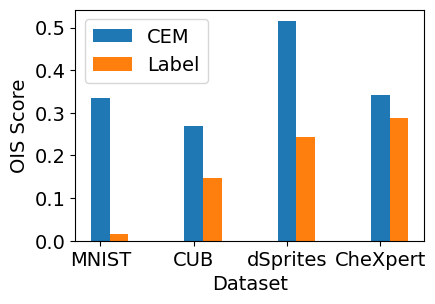

In [61]:
plt.figure(figsize=(4.5,3))
datasets = ["cub","mnist","dsprites","chexpert"]
ois_values = {}

for d in datasets:
    obj = json.load(open("results/evaluation/ois/{}.json".format(d)))
    ois_values[d] = obj

avg_by_dataset_value = {}

for d in datasets:
    avg_by_dataset_value[d] = {'cem': [], 'label': []}
    for seed in [43,44,45]:
        for key in avg_by_dataset_value[d]:
            avg_by_dataset_value[d][key].append(ois_values[d][str(seed)][key])
    for key in avg_by_dataset_value[d]:
        avg_by_dataset_value[d][key] = (np.mean(avg_by_dataset_value[d][key]),np.std(avg_by_dataset_value[d][key] ))

dataset_to_nice = {
    'cub': 'CUB', 
    'dsprites': 'dSprites',
    'mnist': 'MNIST',
    'chexpert': 'CheXpert',
}
methods_to_nice = {
    'cem': 'CEM',
    'label': 'Label',
}
datasets = ['mnist','cub','dsprites','chexpert']
methods = ['cem','label']
width = 0.2
plt.ylabel("OIS Score",fontsize=14)
plt.xlabel("Dataset",fontsize=14)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],fontsize=14)
plt.xticks(list(range(len(datasets))),[dataset_to_nice[d] for d in datasets],fontsize=14)

for i in range(len(methods)):
    x_coords = np.array(list(range(0,len(datasets))))+width*i
    y_coords = [avg_by_dataset_value[d][methods[i]][0] for d in datasets]
    plt.bar(x_coords,y_coords,width=width,label=methods_to_nice[methods[i]])
plt.legend(fontsize=14)
plt.savefig('figures/ois_scores.pdf', dpi=300, bbox_inches='tight')    


colored_mnist cem 0.33524480660756434
colored_mnist label 0.016070607801278433
CUB cem 0.2694275435947237
CUB label 0.14679315544310068
dsprites cem 0.5162684122721354
dsprites label 0.24229840879087097
chexpert cem 0.3429291064922626
chexpert label 0.28713859655918217


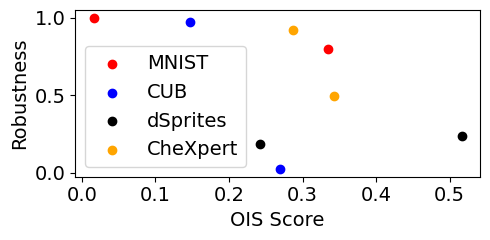

In [74]:
plt.figure(figsize=(5,2.5))
datasets = ["CUB","colored_mnist","dsprites","chexpert"]
ois_values = {}

for d in datasets:
    obj = json.load(open("results/evaluation/ois/{}.json".format(d.lower().replace("colored_mnist","mnist"))))
    ois_values[d] = obj

avg_by_dataset_value = {}

for d in datasets:
    avg_by_dataset_value[d] = {'cem': [], 'label': []}
    for seed in [43,44,45]:
        for key in avg_by_dataset_value[d]:
            avg_by_dataset_value[d][key].append(ois_values[d][str(seed)][key])
    for key in avg_by_dataset_value[d]:
        avg_by_dataset_value[d][key] = (np.mean(avg_by_dataset_value[d][key]),np.std(avg_by_dataset_value[d][key] ))

avg_by_dataset_value_robustness = {}

for d in datasets:
    avg_by_dataset_value_robustness[d] = {'cem': 0, 'label': 0}
    
    for m in avg_by_dataset_value[d]:
        file_name = "results/evaluation/{}/{}_{}.txt".format(d,d.lower().replace("colored_",""),m)
        f = open(file_name).read().split("\n")
        f = [i for i in f if 'Robustness' in i][0]
        f = eval(f.split(": ")[1])
        mean, std = f
        avg_by_dataset_value_robustness[d][m] = 1-mean 

colors = ['red','blue','black','orange']
labels = ['MNIST','CUB','dSprites','CheXpert']

for i,d in enumerate(['colored_mnist','CUB','dsprites','chexpert']):
    scatter_x = []
    scatter_y = []

    for m in avg_by_dataset_value[d]:
        print(d,m,avg_by_dataset_value[d][m][0])
        scatter_x.append(avg_by_dataset_value[d][m][0])
        scatter_y.append(avg_by_dataset_value_robustness[d][m])
        color_list.append(colors[i])
        labels_list.append(labels[i])
    plt.scatter(scatter_x,scatter_y,c=colors[i],label=labels[i])
plt.ylabel("Robustness",fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("OIS Score",fontsize=14)
plt.yticks([0,0.5,1.0],fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout() 
plt.savefig('figures/ois_scatter.pdf', dpi=300, bbox_inches='tight')    


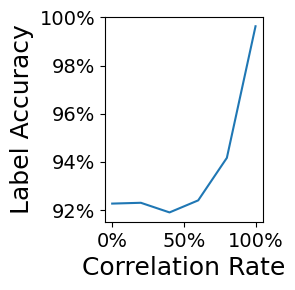

In [93]:
plt.figure(figsize=(3,3))
concept_correlations = json.load(open("results/evaluation/mnist_correlation/correlation_data.json"))
keys = sorted(list(concept_correlations.keys()))
plt.plot([float(i) for i in keys],[np.mean([j[0] for j in concept_correlations[i]]) for i in keys])
plt.xticks([0,0.5,1.0],["0%","50%","100%"],fontsize=14)
plt.yticks([0.92,0.94,0.96,0.98,1.0],["92%","94%","96%","98%","100%"],fontsize=14)
plt.xlabel("Correlation Rate",fontsize=18)
plt.ylabel("Label Accuracy",fontsize=18)
plt.tight_layout()
plt.savefig('figures/concept_correlations_mnist_y.pdf', dpi=300, bbox_inches='tight')    



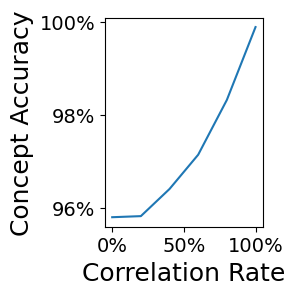

In [92]:
plt.figure(figsize=(3,3))
concept_correlations = json.load(open("results/evaluation/mnist_correlation/correlation_data.json"))
keys = sorted(list(concept_correlations.keys()))
plt.plot([float(i) for i in keys],[np.mean([j[1] for j in concept_correlations[i]]) for i in keys])
plt.xticks([0,0.5,1.0],["0%","50%","100%"],fontsize=14)
plt.yticks([0.96,0.98,1.0],["96%","98%","100%"],fontsize=14)
plt.xlabel("Correlation Rate",fontsize=18)
plt.ylabel("Concept Accuracy",fontsize=18)
plt.tight_layout()
plt.savefig('figures/concept_correlations_mnist_c.pdf', dpi=300, bbox_inches='tight')    



In [23]:
concept_correlations = json.load(open("results/evaluation/mnist_correlation/correlation_data.json"))
concept_correlations['0'][0]

{'0': {'test_y_accuracy': 0.9309999942779541,
  'test_c_accuracy': 0.9581000208854675},
 '4': {'test_y_accuracy': 0.921999990940094,
  'test_c_accuracy': 0.9564999341964722},
 '8': {'test_y_accuracy': 0.9240000247955322,
  'test_c_accuracy': 0.9564999341964722},
 '12': {'test_y_accuracy': 0.9240000247955322,
  'test_c_accuracy': 0.9564999341964722},
 '16': {'test_y_accuracy': 0.9259999990463257,
  'test_c_accuracy': 0.9564999341964722},
 '20': {'test_y_accuracy': 0.9309999942779541,
  'test_c_accuracy': 0.9564999341964722}}

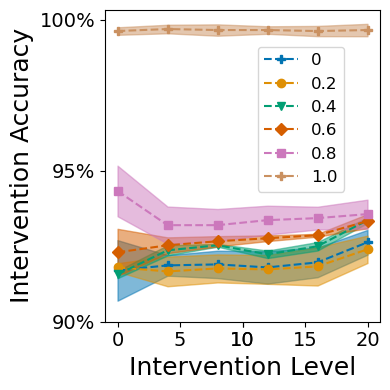

In [53]:
plt.figure(figsize=(4,4))
concept_correlations = json.load(open("results/evaluation/mnist_correlation/correlation_data.json"))
keys = sorted(list(concept_correlations.keys()))

clrs = sns.color_palette("colorblind", 10)
shapes = ['P','o','v','D','s']
styles = [shapes[i%5]+'--' for i in range(7)]

for idx,k in enumerate(keys):
    intervention_keys = concept_correlations[k][0].keys() 
    intervention_keys = sorted([int(i) for i in intervention_keys])
    intervention_values = [[concept_correlations[k][j][str(i)]['test_y_accuracy'] for j in range(3)] for i in intervention_keys]
    intervention_mean = np.array([np.mean(i) for i in intervention_values])
    intervention_std = np.array([np.std(i) for i in intervention_values])
    plt.plot(intervention_keys,intervention_mean,styles[idx],label=str(k),color=clrs[idx])
    plt.fill_between(intervention_keys,intervention_mean-intervention_std,intervention_mean+intervention_std,color=clrs[idx],alpha=0.5)
plt.xticks([0,5,10,10,15,20],fontsize=14)
plt.yticks([0.9,0.95,1.0],["90%","95%","100%"],fontsize=14)
plt.xlabel("Intervention Level",fontsize=18)
plt.ylabel("Intervention Accuracy",fontsize=18)
plt.tight_layout()
plt.legend(fontsize=12,loc='center right',bbox_to_anchor=[0.9, 0.65])
plt.savefig('figures/concept_correlations_mnist_intervention.pdf', dpi=300, bbox_inches='tight')    



In [30]:
intervention_values, intervention_mean

([[0.9980000257492065, 0.9959999918937683, 0.9950000047683716],
  [0.9980000257492065, 0.9980000257492065, 0.9950000047683716],
  [0.9980000257492065, 0.9980000257492065, 0.9940000176429749],
  [0.9980000257492065, 0.996999979019165, 0.9950000047683716],
  [0.9980000257492065, 0.996999979019165, 0.9940000176429749],
  [0.9990000128746033, 0.996999979019165, 0.9940000176429749]],
 [0.9963333408037821,
  0.9970000187555949,
  0.996666689713796,
  0.996666669845581,
  0.9963333408037821,
  0.996666669845581])

# Intervention Experiments

In [16]:
def plot_intervention(methods,names,dataset,dataset_name,total_concepts,ylim,yticks):
    if type(methods) == type("a"):
        results = json.load(open("results/intervention/{}/{}.json".format(dataset,methods)))
        results = [results[str(i)] for i in sorted(map(int,results.keys()))]
    else:
        results = [json.load(open("results/intervention/{}/{}.json".format(dataset,i))) for i in methods]
    
    clrs = sns.color_palette("colorblind", 10)
    styles = ['-' for i in range(len(names))]

    if "epochs" in names[0]:
        styles[3:] = ["--" for i in range(3)]
        clrs[3:6] = clrs[:3]
    
    plt.figure(figsize=(6,6))

    for i,result in enumerate(results):
        name = names[i]
        
        color = clrs[i]
        x_vals = result.keys()
        x_vals = [int(i)/total_concepts for i in x_vals if i!='parameters']
        x_vals = sorted(x_vals)
        all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result if intervention_idx != 'parameters']
        y_vals = np.array([np.mean(j) for j in all_y_vals])
        y_stds = np.array([np.std(j) for j in all_y_vals])

        x_vals = [i for i in x_vals if i<=1]
        y_vals = y_vals[:len(x_vals)]

        ytick_string = [str(round(i*100))+"%" for i in yticks]

        plt.ylim(ylim)
        plt.plot(x_vals,y_vals,label=name,linestyle=styles[i],color=clrs[i])
        plt.xlabel("Fraction of Concept Groups Intervened",fontsize=16)
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"],fontsize=16)
        plt.yticks(yticks,ytick_string,fontsize=16)
        plt.ylabel("Accuracy",fontsize=16)
        plt.scatter(x_vals,y_vals)
        plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)
    plt.legend(fontsize=16)


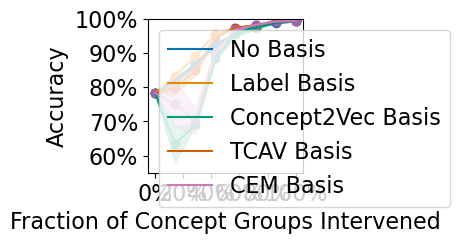

In [15]:
plot_intervention(["baseline","labels","concept2vec","tcav","cem"],["No Basis","Label Basis","Concept2Vec Basis","TCAV Basis","CEM Basis"],"cub","CUB",28,[0.55,1],[0.6,0.7,0.8,0.9,1.0])
plt.savefig("figures/cub_intervention.pdf",dpi=300,bbox_inches='tight')

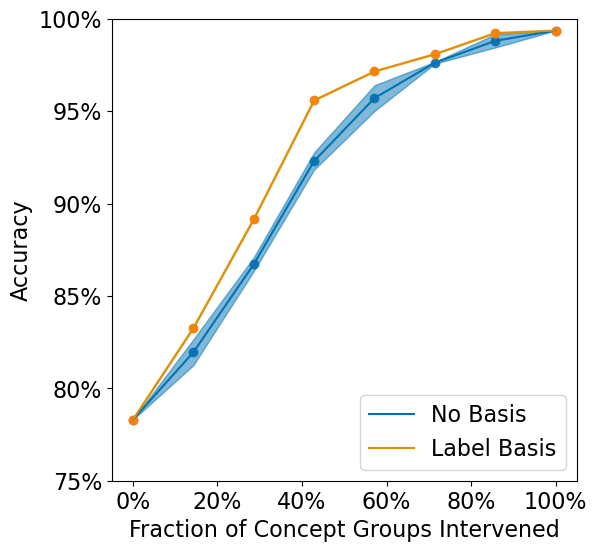

In [12]:
plot_intervention(["baseline","labels"],["No Basis","Label Basis"],"cub","CUB",28,[0.75,1],[0.75,0.8,0.85,0.9,0.95,1.0])
plt.savefig("figures/cub_intervention_label.pdf",dpi=300,bbox_inches='tight')

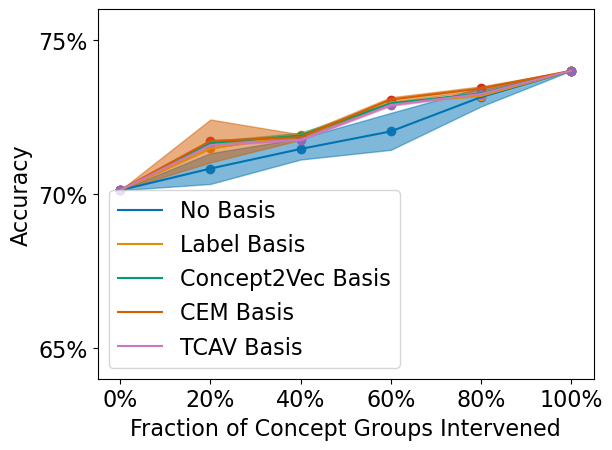

In [83]:
plot_intervention(["baseline","labels","concept2vec","cem","tcav"],["No Basis","Label Basis","Concept2Vec Basis","CEM Basis","TCAV Basis"],"mnist","MNIST",20,[0.64,0.76],[0.65,0.7,0.75])
plt.savefig("figures/mnist_intervention.pdf",dpi=300,bbox_inches='tight')

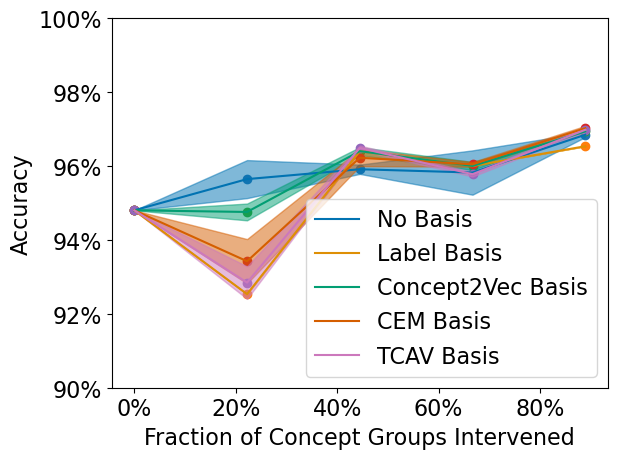

In [84]:
plot_intervention(["baseline","labels","concept2vec","cem","tcav"],["No Basis","Label Basis","Concept2Vec Basis","CEM Basis","TCAV Basis"],"dsprites","dSprites",18,[0.9,1.0],[0.9,0.92,0.94,0.96,0.98,1.0])
plt.savefig("figures/dsprites_intervention.pdf",dpi=300,bbox_inches='tight')

In [ ]:
plot_intervention("shapley_indices",["1","5","10","15","20"],"cub","CUB",28,[0.75,1],[0.75,0.8,0.85,0.9,0.95,1.0])
plt.savefig("figures/shapley_indices.pdf",dpi=300,bbox_inches='tight')

### Explaining Intervention Experiments

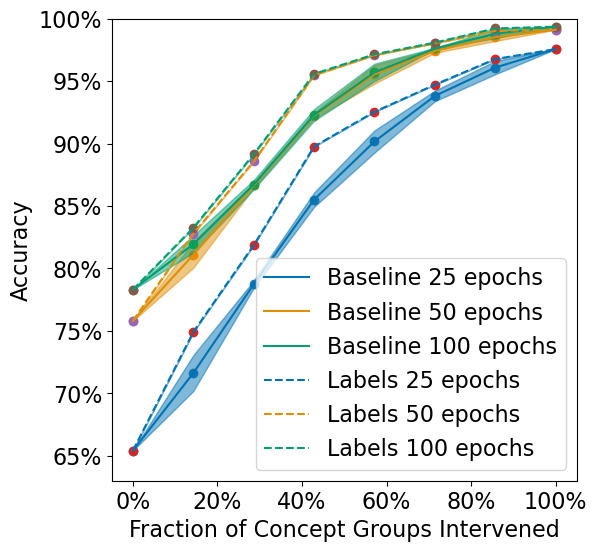

In [13]:
plot_intervention(["baseline_25","baseline_50","baseline","labels_25","labels_50","labels"],["Baseline 25 epochs","Baseline 50 epochs","Baseline 100 epochs","Labels 25 epochs","Labels 50 epochs","Labels 100 epochs"],"cub","CUB",28,[0.63,1],[0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.savefig("figures/intervention_epochs.pdf",dpi=300,bbox_inches='tight')

In [ ]:
plot_intervention(["baseline","labels","anti_correlation"],["Baseline","Labels","Opposite Labels"],"cub","CUB",28,[0.75,1],[0.75,0.8,0.85,0.9,0.95,1])

### Extra Evaluation

In [ ]:
agreement_mnist = json.load(open("results/evaluation/ablation/agreement_mnist.json"))
methods = ["cem","concept2vec","tcav","label"]
names = ["CEM","Concept2Vec","TCAV","Label"]
avg_agreement_by_method = [np.mean(agreement_mnist[i]) for i in methods]
std_agreement_by_method = [np.std(agreement_mnist[i]) for i in methods]

fig, ax = plt.subplots(figsize=(6,6))

# Set the x-ticks and labels
width = 0.2
ind = np.arange(len(methods))+width
ax.set_xticklabels(names)

# Set the y-axis label
ax.set_ylabel('Agreement with MNIST',fontsize=20)
plt.xlabel("Method",fontsize=20)

# Plot the bars with standard deviation error bars
ax.bar(ind, avg_agreement_by_method, width, label=names, yerr=std_agreement_by_method)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(names,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


In [ ]:
agreement_mnist = json.load(open("results/evaluation/ablation/agreement_mnist.json"))
methods = ["cem","concept2vec","tcav","label"]
names = ["CEM","Concept2Vec","TCAV","Label"]
avg_agreement_by_method = [np.mean(agreement_mnist[i]) for i in methods]
std_agreement_by_method = [np.std(agreement_mnist[i]) for i in methods]

for i in range(len(methods)):
    if i == len(methods)-1:
        end = "\\bottomrule"
    else:
        end = ""
    print("{} & {}\\% $\\pm$ {}\\% \\\\ {}".format(names[i],
                                        round(avg_agreement_by_method[i]*100),
                                        round(std_agreement_by_method[i]*100),end))


In [ ]:
randomness_cem_tcav = json.load(open("results/evaluation/ablation/randomness_cem_tcav.json"))
datasets = ['mnist','cub','dsprites','chexpert']
methods = ['cem','tcav']
method_names = ["CEM","TCAV"]

truth_data = {}

for d in datasets:
    truth_data[d] = []
    
    for m in methods:
        truth_data[d].append(abs(randomness_cem_tcav[m][d]['z_score']))

datasets = ['MNIST','CUB','DSprites','CheXpert']

cb_palette = sns.color_palette("colorblind")

# Set the color cycle to use this palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cb_palette)

means = []
stds = []
for group in truth_data.keys():
    group_data = truth_data[group]
    group_means = [t for t in group_data]
    means.append(group_means)
    
means = list(np.array(means).T)

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(6,2))

# Set the x-ticks and labels
ind = np.arange(len(datasets))
ax.set_xticks(ind)
ax.set_xticklabels(datasets)

# Set the y-axis label
ax.set_ylabel('Z-Score',fontsize=20)
plt.xlabel("Dataset",fontsize=20)

# Plot the bars with standard deviation error bars
width = 0.2
for i in range(len(means)):
    group_means = [j for j in means[i]] # Flip Robustness due to definition
    ax.bar(ind + i*width, group_means, width, label=datasets)

ax.set_xticks([r + width for r in range(len(ind))])
ax.set_xticklabels(datasets,fontsize=16)
    
fmt = mtick.PercentFormatter(xmax=1.0)
ax.yaxis.set_major_formatter(fmt)
plt.yticks([0,1,2,3,4],fontsize=16)
ax.set_yticklabels([0,1,2,3,4])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', length=0)


# Add a legend
ax.legend(method_names,fontsize=16)

plt.savefig('figures/tcav_cem_randomness.pdf', dpi=300, bbox_inches='tight')    

# Show the plot
plt.show()


### Comparing different Hierarchies

In [ ]:
hierarchy_by_metric = json.load(open("results/extra_evaluation/distance_cosine_euclidean_top_k.json"))

In [ ]:
metric_distances = json.load(open('results/extra_evaluation/metric_distances.json','r'))

In [ ]:
metric_distances

In [ ]:
metric_to_nice = {
    'euclidean': 'Euclidean', 
    'cosine': 'Cosine',
    'manhattan': 'Manhattan'
}

method_to_nice = {
    'cem': 'CEM',
    'concept2vec':'Concept2Vec',
    'label': 'Label',
    'shapley': 'Shapley',
}

In [ ]:
for method in metric_distances:
    plt.title(method_to_nice[method])
    labels = ['euclidean','cosine','manhattan']

    metric_distances_method = np.array([[metric_distances[method][i][j][0] for j in labels] for i in labels])

    plt.imshow(metric_distances_method, cmap='viridis', interpolation='nearest')

    # Add labels and ticks
    plt.xticks(np.arange(len(labels)), [metric_to_nice[i] for i in labels], rotation=45)
    plt.yticks(np.arange(len(labels)), [metric_to_nice[i] for i in labels])
    colorbar = plt.colorbar()
    colorbar.set_label('Basis Distance')

    plt.savefig("figures/metric_distance_{}.pdf".format(method), dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


    plt.figure() 

In [ ]:
distance_by_hierarchy_cub = json.load(open('results/extra_evaluation/distance_between_hierarchies.json','r'))

In [ ]:
labels = ['cem','shapley','label','concept2vec']

plt.imshow(distance_by_hierarchy_cub, cmap='viridis', interpolation='nearest')

# Add labels and ticks
plt.xticks(np.arange(len(labels)), [method_to_nice[i] for i in labels], rotation=45)
plt.yticks(np.arange(len(labels)), [method_to_nice[i] for i in labels])
colorbar = plt.colorbar()
colorbar.set_label('Basis Distance')

plt.savefig("figures/hierarchy_distances.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Comparison With Ground Truth

In [ ]:
mnist_distances = json.load(open('results/evaluation/ablation/distance_mnist.json','r'))
cub_distances_part_1 = json.load(open('results/evaluation/ablation/distance_cub_first_part.json','r'))
cub_distances_part_2 = json.load(open('results/evaluation/ablation/distance_cub_second_part.json','r'))

In [ ]:
mnist_distances

In [ ]:
cub_distances_part_1

In [ ]:
cub_distances_part_2

In [ ]:
labels_x = ['TCAV','CEM','Concept2Vec','Label']
labels_y = ['MNIST','CUB Group 1', 'CUB Group 2'] 

distances_as_matrix = [
    [j[i][0] for j in [mnist_distances,cub_distances_part_1,cub_distances_part_2]] for i in labels_x
]

plt.imshow(np.array(distances_as_matrix).T, cmap='viridis', interpolation='nearest')

# Add labels and ticks
plt.xticks(np.arange(len(labels_x)), [i for i in labels_x], rotation=45)
plt.yticks(np.arange(len(labels_y)), labels_y)
colorbar = plt.colorbar()
colorbar.set_label('Basis Distance')

plt.savefig("figures/heuristic_distances.pdf", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Qualitative Evaluation

#### MNIST

In [ ]:
dataset = MNIST_Dataset()
attributes = dataset.get_attributes()

In [ ]:
mnist_hierarchy_labels = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_labels)

In [ ]:
mnist_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_shapley)

In [ ]:
mnist_hierarchy_tcav = create_hierarchy(create_ward_hierarchy,load_tcav_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_tcav)

In [ ]:
mnist_hierarchy_cem = create_hierarchy(create_ward_hierarchy,load_cem_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_cem)

In [ ]:
mnist_hierarchy_concept2vec = create_hierarchy(create_ward_hierarchy,load_concept2vec_vectors_simple,dataset,'',attributes,43)
print(mnist_hierarchy_concept2vec)

#### CUB

In [ ]:
dataset = CUB_Dataset()
attributes = dataset.get_attributes()

In [ ]:
cub_hierarchy_labels = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_labels)

In [ ]:
cub_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_shapley)

In [ ]:
cub_hierarchy_tcav = create_hierarchy(create_ward_hierarchy,load_tcav_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_tcav)

In [ ]:
cub_hierarchy_cem = create_hierarchy(create_ward_hierarchy,load_cem_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_cem)

In [ ]:
cub_hierarchy_concept2vec = create_hierarchy(create_ward_hierarchy,load_concept2vec_vectors_simple,dataset,'',attributes,43)
print(cub_hierarchy_concept2vec)

#### DSprites

In [ ]:
dataset = DSprites_Dataset()
attributes = dataset.get_attributes()

In [ ]:
dsprites_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(dsprites_hierarchy_shapley)

#### CheXpert

In [ ]:
dataset = Chexpert_Dataset()
attributes = dataset.get_attributes()

In [ ]:
chexpert_hierarchy_shapley = create_hierarchy(create_ward_hierarchy,load_shapley_vectors_simple,dataset,'',attributes,43)
print(chexpert_hierarchy_shapley)

In [ ]:
chexpert_hierarchy_label = create_hierarchy(create_ward_hierarchy,load_label_vectors_simple,dataset,'',attributes,43)
print(chexpert_hierarchy_label)